In [101]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme(palette="colorblind")

In [102]:
# Default date ranges
from datetime import datetime

import pytz


DEFAULT_DATE_RANGES = (
    ('2019-05-01', '2019-08-31'),
    ('2019-09-01', '2019-12-31'),
    ('2020-02-01', '2020-05-31'),
    ('2021-05-01', '2021-08-31'),
)

# Mapping between name of default period to dates
DEFAULT_PERIOD_TO_RANGE = {
    'Summer 2019':         DEFAULT_DATE_RANGES[0],
    'Pre-COVID-19 Summer': DEFAULT_DATE_RANGES[0],
    'Fall 2019':           DEFAULT_DATE_RANGES[1],
    'Pre-COVID-19 Fall':   DEFAULT_DATE_RANGES[1],
    'Spring 2020':         DEFAULT_DATE_RANGES[2],
    'In-COVID-19':         DEFAULT_DATE_RANGES[2],
    'Summer 2021':         DEFAULT_DATE_RANGES[3],
    'Post-COVID-19':       DEFAULT_DATE_RANGES[3],
}

timezone = pytz.timezone('America/Los_Angeles')
spring2018 = (datetime(2018, 2, 1, tzinfo=timezone), datetime(2018, 5, 31, tzinfo=timezone))
summer2018 = (datetime(2018, 5, 1, tzinfo=timezone), datetime(2018, 8, 31, tzinfo=timezone))
fall2018 = (datetime(2018, 9, 1, tzinfo=timezone), datetime(2018, 12, 31, tzinfo=timezone))
spring2019 = (datetime(2019, 2, 1, tzinfo=timezone), datetime(2019, 5, 31, tzinfo=timezone))
summer2019 = (datetime(2019, 5, 1, tzinfo=timezone), datetime(2019, 8, 31, tzinfo=timezone))
fall2019 = (datetime(2019, 9, 1, tzinfo=timezone), datetime(2019, 12, 31, tzinfo=timezone))
spring2020 = (datetime(2020, 2, 1, tzinfo=timezone), datetime(2020, 5, 31, tzinfo=timezone))
summer2020 = (datetime(2020, 6, 1, tzinfo=timezone), datetime(2020, 8, 31, tzinfo=timezone))
fall2020 = (datetime(2020, 9, 1, tzinfo=timezone), datetime(2020, 12, 31, tzinfo=timezone))
summer2021 = (datetime(2021, 5, 1, tzinfo=timezone), datetime(2021, 8, 31, tzinfo=timezone))

In [ ]:
from gymportal.data import extract_training_data
from src.utils import get_data


def get_train(period):
    data = get_data('caltech', "DEMO_TOKEN", drop_columns=(), start=period[0], end=period[1])
    # data = data.dropna(subset=["userInputs"])
    data = data[data.connectionTime.dt.day == data.disconnectTime.dt.day]

    return data, extract_training_data(data)

In [104]:
full = (datetime(2018, 3, 25, tzinfo=timezone), datetime(2021, 9, 13, tzinfo=timezone))
# triple = (datetime(2018, 3, 25, tzinfo=timezone), datetime(2020, 5, 31, tzinfo=timezone))
my_pick = (datetime(2019, 2, 1, tzinfo=timezone), datetime(2020, 5, 31, tzinfo=timezone))
# get_data('caltech', "DEMO_TOKEN", drop_columns=(), start=full[0], end=full[1])

In [ ]:
data = {
    "spring2018": get_train(spring2018), # !Note!: spring2018 is not fully available in the data, that only starts in march!
    "summer2018": get_train(summer2018),
    "fall2018": get_train(fall2018),
    "spring2019": get_train(spring2019),
    "summer2019": get_train(summer2019),
    "fall2019": get_train(fall2019),
    "spring2020": get_train(spring2020),
    "summer2020": get_train(summer2020),
    "fall2020": get_train(fall2020),
    "summer2021": get_train(summer2021),
    "spring2019 to spring2020": get_train(my_pick),
    "full": get_train(full),
}

# data

In [106]:
for key, (_, X) in data.items():
    print(f"{key}:{X.shape}")

spring2018:(1783, 3)
summer2018:(7242, 3)
fall2018:(6408, 3)
spring2019:(3616, 3)
summer2019:(3346, 3)
fall2019:(3069, 3)
spring2020:(1231, 3)
summer2020:(103, 3)
fall2020:(256, 3)
summer2021:(1765, 3)
spring2019 to spring2020:(11200, 3)
full:(29411, 3)


In [107]:
# fig = plt.figure(figsize=(10, 10))
# for i, (key, X_train) in enumerate(data.items(), start=1):
#     ax = fig.add_subplot(2, 2, i, projection='3d')
#     ax.set_title(key)
#     ax.set_xlabel("arrival")
#     ax.set_ylabel("duration")
#     ax.set_zlabel("demand")

#     ax.scatter(X_train[:, 0], X_train[:, 1], X_train[:, 2], alpha=0.1)

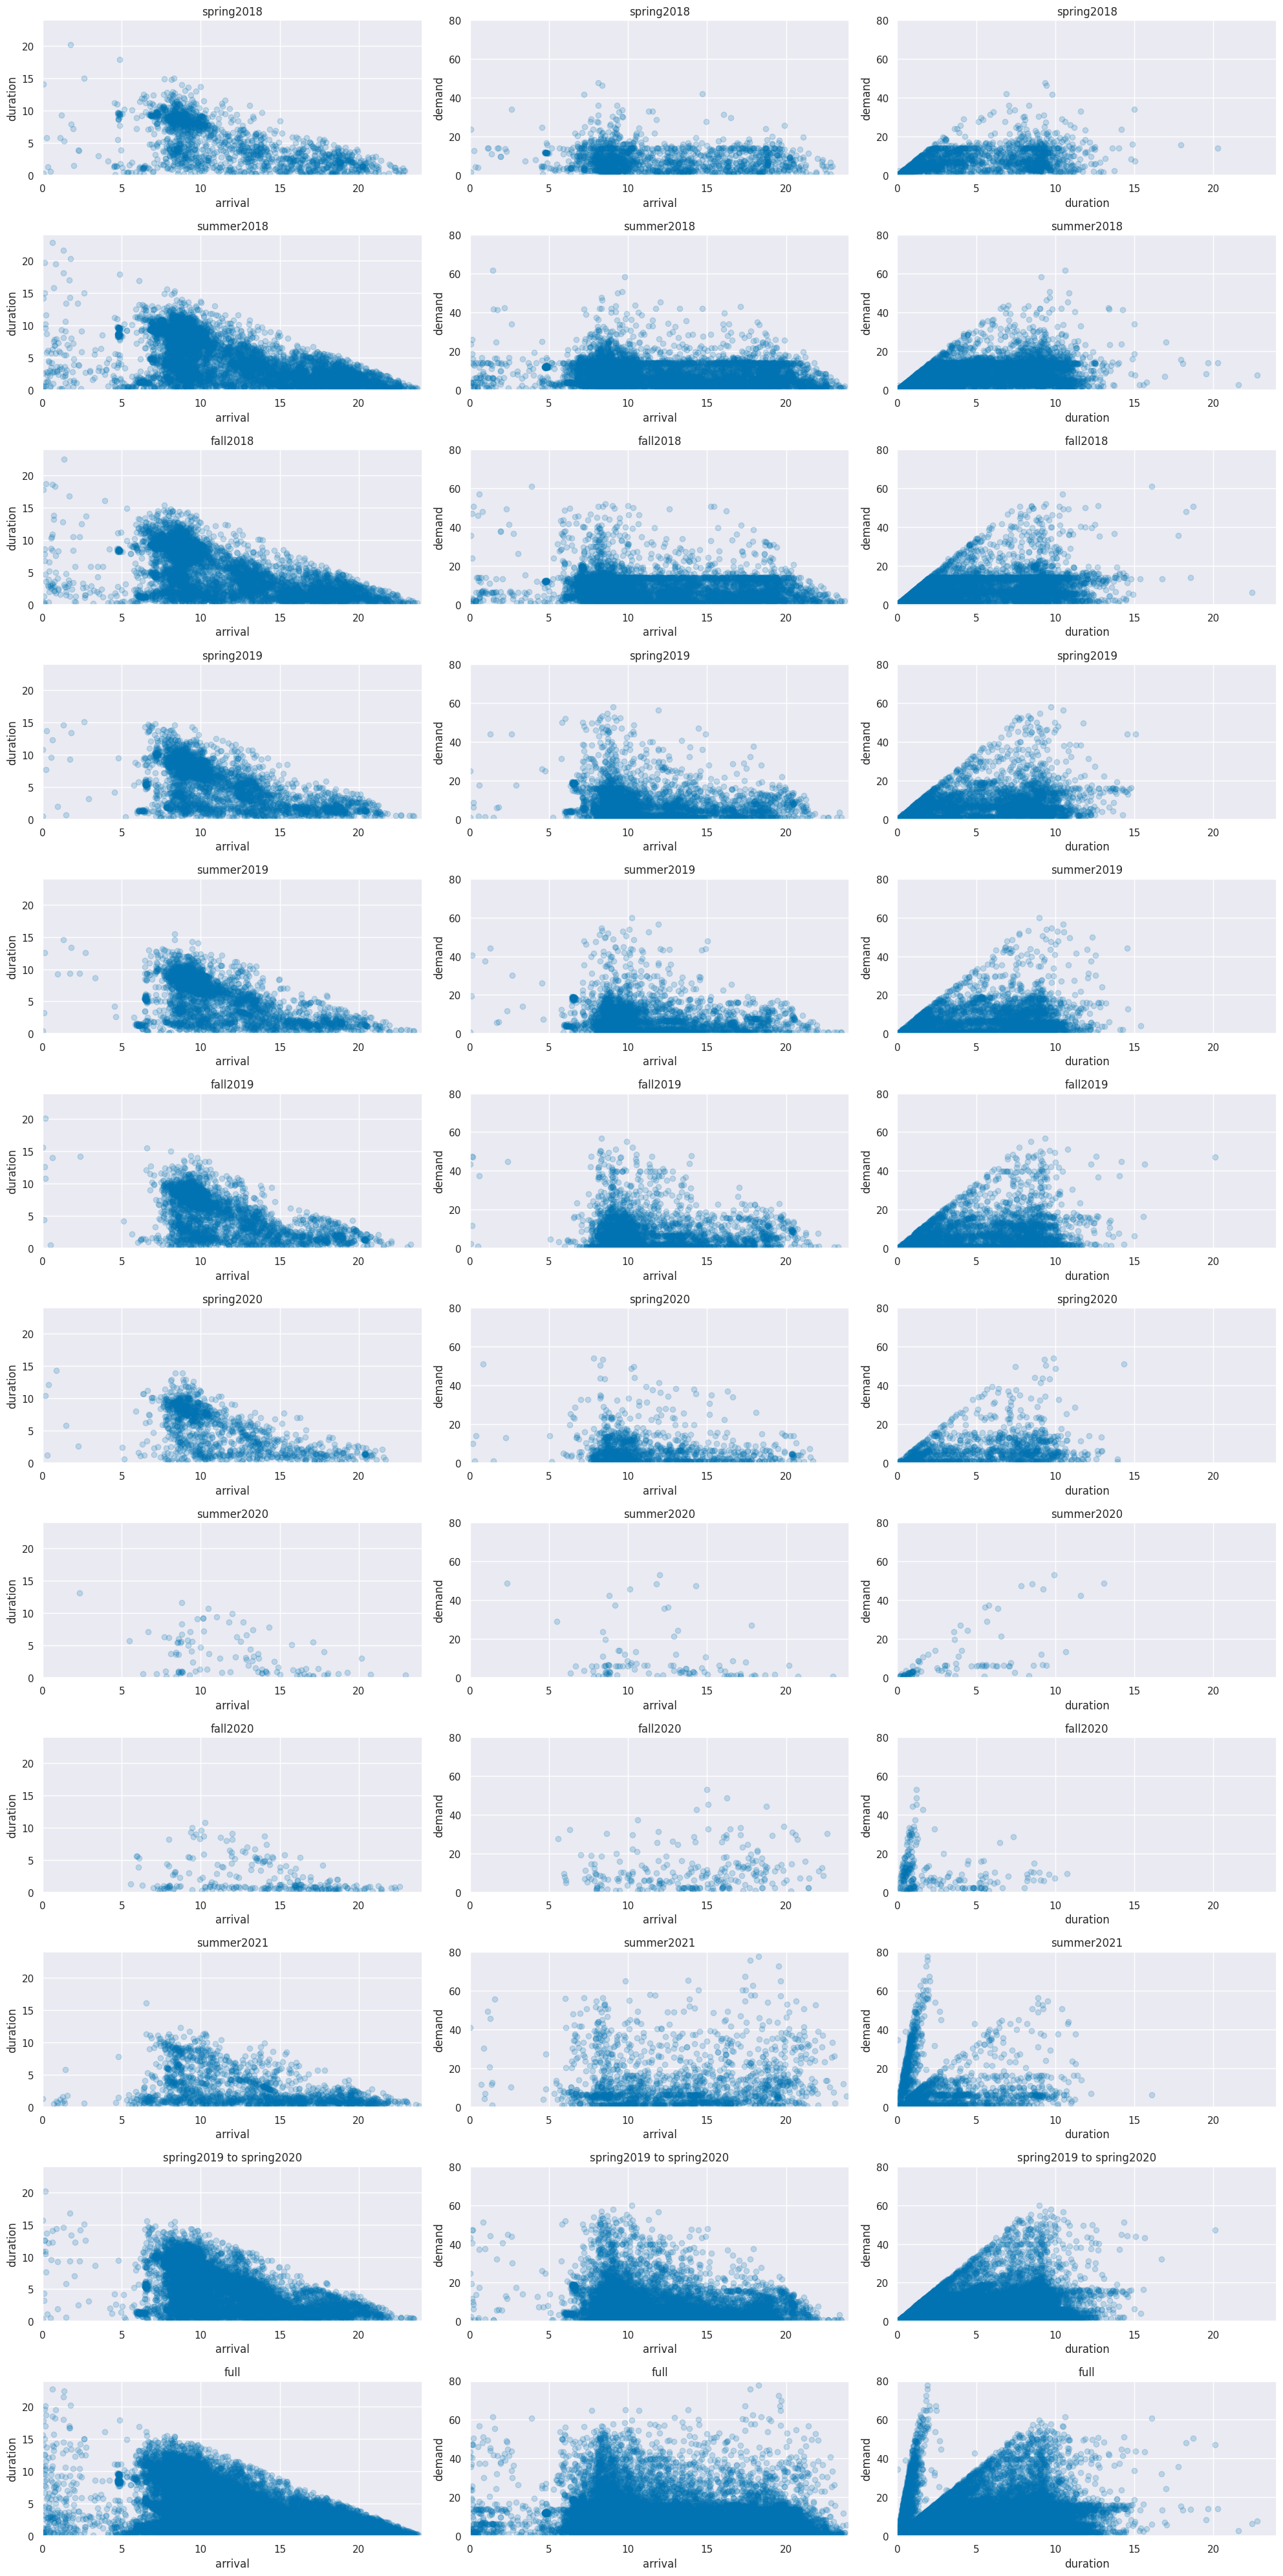

In [108]:
fig = plt.figure(figsize=(20, 40), tight_layout=True)
n_rows = len(data.items())

i = 1
for key, (_, X_train) in data.items():
    ax = fig.add_subplot(n_rows, 3, i)
    ax.set_title(key)
    ax.set_xlabel("arrival")
    ax.set_ylabel("duration")
    ax.set_xlim((0, 24))
    ax.set_ylim(0, 24)
    ax.scatter(X_train[:, 0], X_train[:, 1], alpha=0.2)

    ax = fig.add_subplot(n_rows, 3, i + 1)
    ax.set_title(key)
    ax.set_xlabel("arrival")
    ax.set_ylabel("demand")
    ax.set_xlim((0, 24))
    ax.set_ylim((0, 80))
    ax.scatter(X_train[:, 0], X_train[:, 2], alpha=0.2)

    ax = fig.add_subplot(n_rows, 3, i + 2)
    ax.set_title(key)
    ax.set_xlabel("duration")
    ax.set_ylabel("demand")
    ax.set_xlim((0, 24))
    ax.set_ylim((0, 80))
    ax.scatter(X_train[:, 1], X_train[:, 2], alpha=0.2)

    i += 3

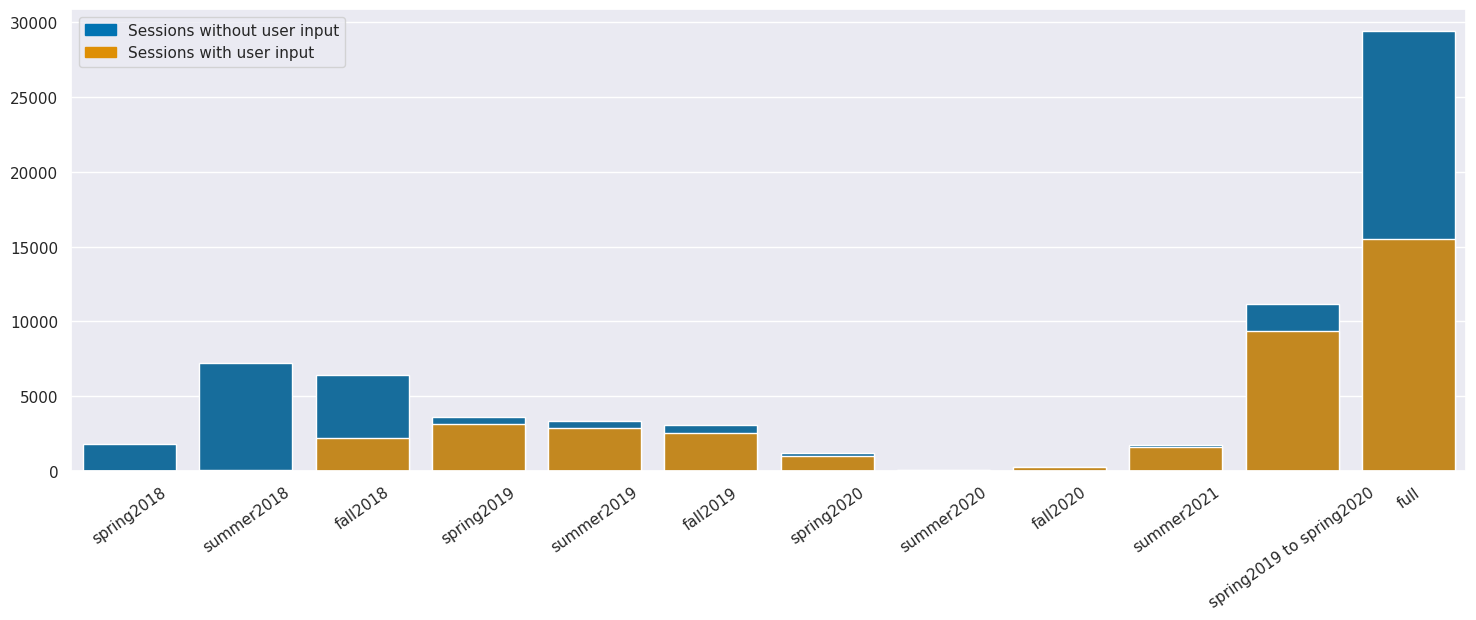

In [ ]:
import matplotlib.patches as mpatches

plt.figure(figsize=(18, 6))

bar1 = sns.barplot(x=data.keys(), y=[len(df) for (df, X) in data.values()])

# df.userInputs == df.userInputs works for filtering "df.userInputs == NaN" because NaN != NaN; whereas df.userInputs != NaN would be True for all rows
bar2 = sns.barplot(x=data.keys(), y=[len(df[df.userInputs == df.userInputs]) for (df, X) in data.values()])

current_palette = sns.color_palette()
top_bar = mpatches.Patch(label='Sessions without user input', color=current_palette[0])
bottom_bar = mpatches.Patch(label='Sessions with user input', color=current_palette[1])
plt.legend(handles=[top_bar, bottom_bar])

# show the graph
plt.xticks(rotation=35)
plt.show()

In [113]:
for (_, d) in data.values():
    print(d.max(axis=0))

[22.91666667 20.27055556 47.808     ]
[23.68333333 22.76722222 61.55      ]
[23.68333333 22.46527778 60.977     ]
[23.48333333 15.06333333 57.887     ]
[23.48333333 15.4225     59.83      ]
[23.3        20.11388889 56.779     ]
[21.68333333 14.35611111 53.925     ]
[22.95       13.06888889 53.068     ]
[22.58333333 10.7525     52.883     ]
[23.81666667 16.09333333 77.7       ]
[23.48333333 20.11388889 59.83      ]
[23.81666667 22.76722222 77.7       ]


In [114]:
from sklearn.discriminant_analysis import StandardScaler
from sklearn.mixture import BayesianGaussianMixture, GaussianMixture

from src.utils import ManualMaxScaler


def get_gmm(X_train):
    # scaler = StandardScaler()
    scaler = ManualMaxScaler([24, 24, 80])
    X_train = scaler.fit_transform(X_train)

    gmm = BayesianGaussianMixture(n_components=50, n_init=20, max_iter=1000)

    gmm.fit(X_train)
    return gmm, scaler

In [115]:
import pickle

try:
    with open("gmms.pkl", "rb") as f:
        gmms = pickle.load(f)
except FileNotFoundError:
    gmms = {
        key: get_gmm(X_train) for key, (_, X_train) in data.items()
    }
    with open("gmms.pkl", "wb") as f:
        pickle.dump(gmms, f)

In [116]:
df = pd.DataFrame([[gmm.score(scaler.transform(X)) for (_, X) in data.values()]
                  for gmm, scaler in gmms.values()], columns=list(data.keys()))
df.index = data.keys()
df

spring2018  summer2018  fall2018  spring2019  \
spring2018                  3.237305    3.083589  2.871247    2.880884   
summer2018                  3.341961    3.325796  3.083911    2.910963   
fall2018                    3.200498    3.181683  3.230921    3.045081   
spring2019                  2.923990    2.800884  2.806053    3.287715   
summer2019                  2.831792    2.696294  2.683605    3.196353   
fall2019                    2.770847    2.638026  2.599576    3.110622   
spring2020                  2.635459    2.527663  2.543643    2.967000   
summer2020                  1.348830    1.334804  1.333679    1.588356   
fall2020                    1.163615    1.145433  0.885641    0.961701   
summer2021                  2.254204    2.176139  2.116431    2.334245   
spring2019 to spring2020    2.902173    2.767241  2.818067    3.394597   
full                        3.257456    3.227555  3.220828    3.319448   

                          summer2019  fall2019  spring2020  summer2020  \
spring2018                  2.902381  2.781077    2.939742    2.174915   
summer2018                  2.937594  2.803707    2.982698    2.651624   
fall2018                    3.057653  2.908224    3.145506    2.568053   
spring2019                  3.311580  3.155543    3.291120    2.405381   
summer2019                  3.393603  3.181187    3.306446    2.352941   
fall2019                    3.235771  3.322443    3.287302    2.532310   
spring2020                  3.120160  3.014982    3.406554    2.549577   
summer2020                  1.648369  1.666650    1.905144    2.881277   
fall2020                    1.143008  1.034057    1.306198    0.629726   
summer2021                  2.403146  2.339028    2.525271    2.321270   
spring2019 to spring2020    3.512420  3.430825    3.548312    2.619494   
full                        3.384828  3.298535    3.452311    2.893355   

                          fall2020  summer2021  spring2019 to spring2020  \
spring2018                0.634899    0.444614                  2.862869   
summer2018               -0.806754   -0.506103                  2.892694   
fall2018                 -0.386870   -0.116718                  3.022683   
spring2019                0.011226    0.176189                  3.253990   
summer2019               -0.183721   -0.139050                  3.261634   
fall2019                 -0.430194   -0.882643                  3.239844   
spring2020                0.307751    0.213223                  3.088692   
summer2020               -0.313577   -1.276343                  1.682642   
fall2020                  3.090387    1.616547                  1.088793   
summer2021                2.870412    2.803634                  2.390314   
spring2019 to spring2020 -0.822080   -0.515042                  3.466025   
full                      2.041158    2.381741                  3.355035   

                              full  
spring2018                2.663658  
summer2018                2.671384  
fall2018                  2.760688  
spring2019                2.696826  
summer2019                2.613839  
fall2019                  2.501769  
spring2020                2.509827  
summer2020                1.217722  
fall2020                  1.142605  
summer2021                2.324576  
spring2019 to spring2020  2.698676  
full                      3.180933

In [117]:
def extract_covariance(cov, i, j):
    return np.array([[cov[i, i], cov[i, j]],
                     [cov[j, i], cov[j, j]]])


In [121]:
gmm, scaler = gmms["spring2019 to spring2020"]
X_train = scaler.transform(data["spring2019 to spring2020"][1])

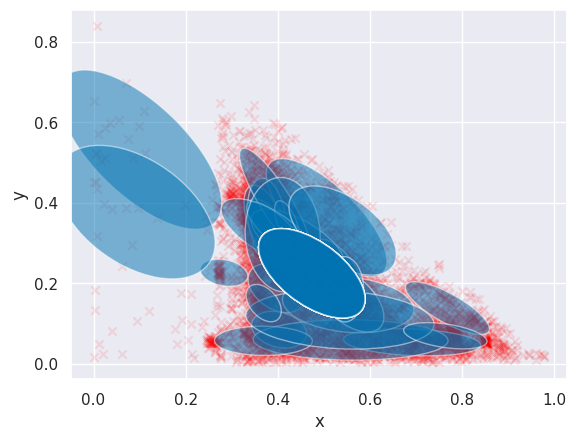

In [122]:
def make_ellipses(gmm, ax, i, j):
    # for n, color in enumerate(colors):
    for cov, means, weight in zip(gmm.covariances_, gmm.means_, gmm.weights_):
        # if weight <= 0.01:
        #     continue
        
        cov = extract_covariance(cov, i, j)
        means = means[[i, j]]

        v, w = np.linalg.eigh(cov)
        u = w[0] / np.linalg.norm(w[0])

        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees

        v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
        ell = mpl.patches.Ellipse(
            means, v[0], v[1], angle=180 + angle,  # color=color
        )
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        # ax.set_aspect("equal", "datalim")


fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(X_train[:, 0], X_train[:, 1], alpha=0.1, color="red", marker="x")
ax.set_xlabel("x")
ax.set_ylabel("y")

make_ellipses(gmm, ax, 0, 1)

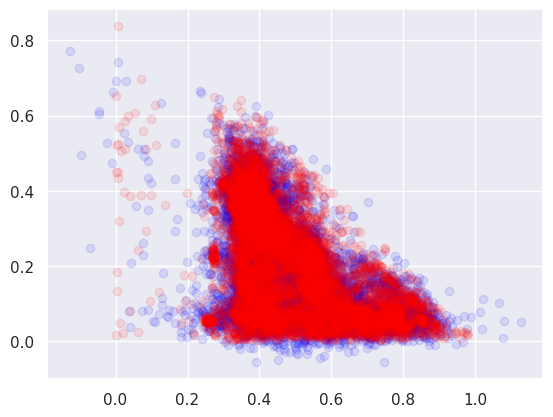

In [123]:
X_gen, _ = gmm.sample(10000)

plt.scatter(X_gen[:, 0], X_gen[:, 1], color="blue", alpha=0.1)
plt.scatter(X_train[:, 0], X_train[:, 1], color="red", marker="o", alpha=0.1)

In [124]:
import seaborn as sns

def plot_kde(season: str, X_gen, X_train):
    fig, axes = plt.subplots(
        nrows=1, ncols=3, figsize=(18, 6), tight_layout=True)
    fig.suptitle(season)

    for i, value in enumerate(["arrival", "duration", "demand"]):
        ax = sns.kdeplot(X_gen[:, i], label="generated", fill=True, ax=axes[i])
        ax = sns.kdeplot(
            X_train[:, i], label="training", fill=True, ax=axes[i])

        # ax.set_aspect("equal", "datalim")
        ax.set_ylim(bottom=0)
        ax.set_xlim(-2, 2)

        ax.set_xlabel("Value")
        ax.set_ylabel("Density")
        ax.set_title(value)
        ax.legend()

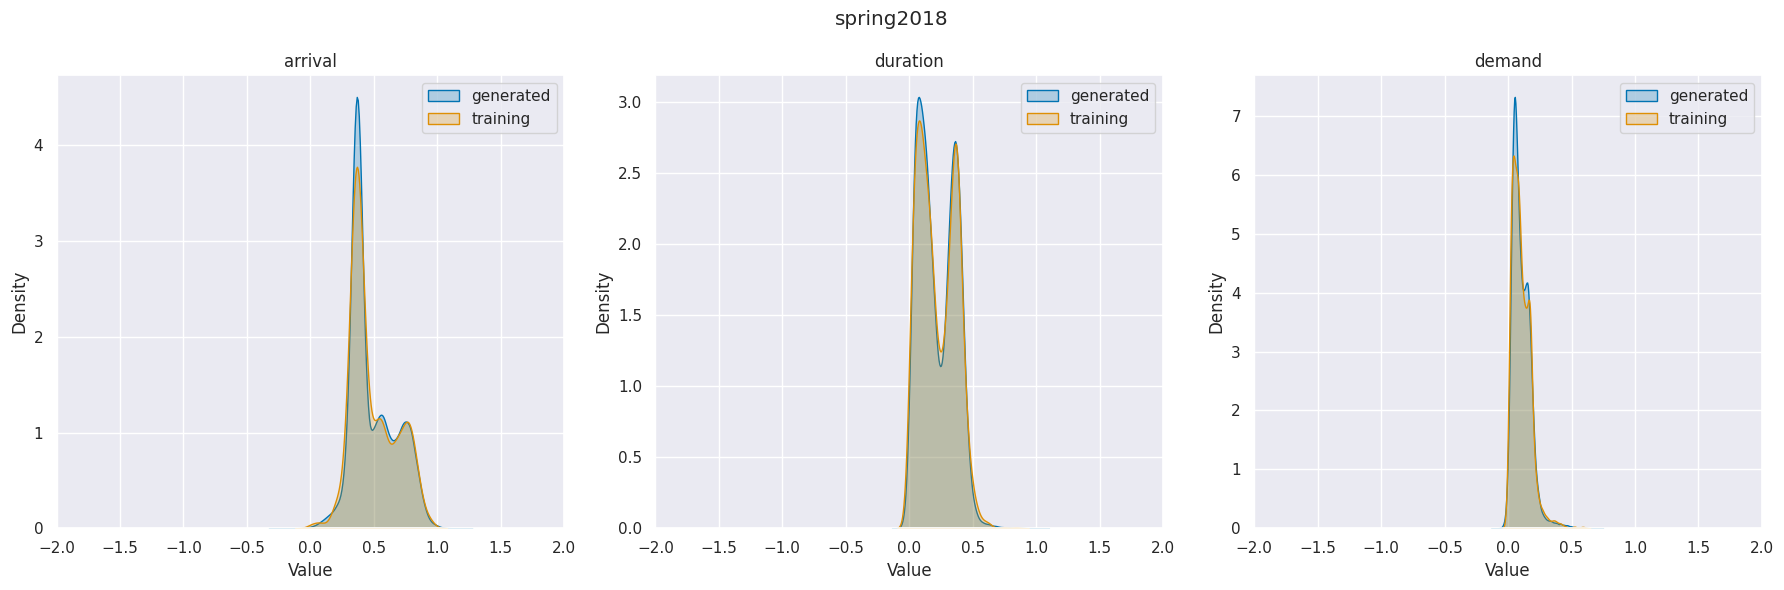

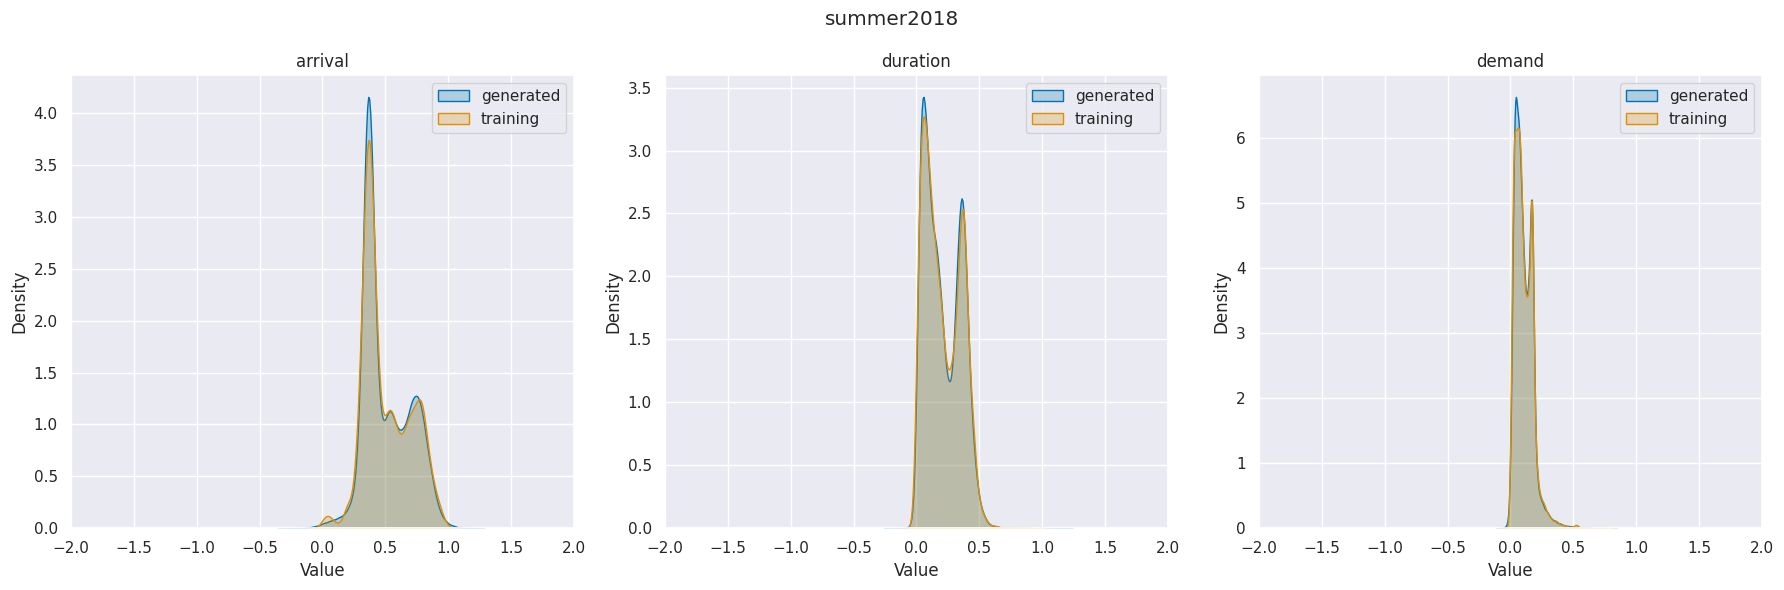

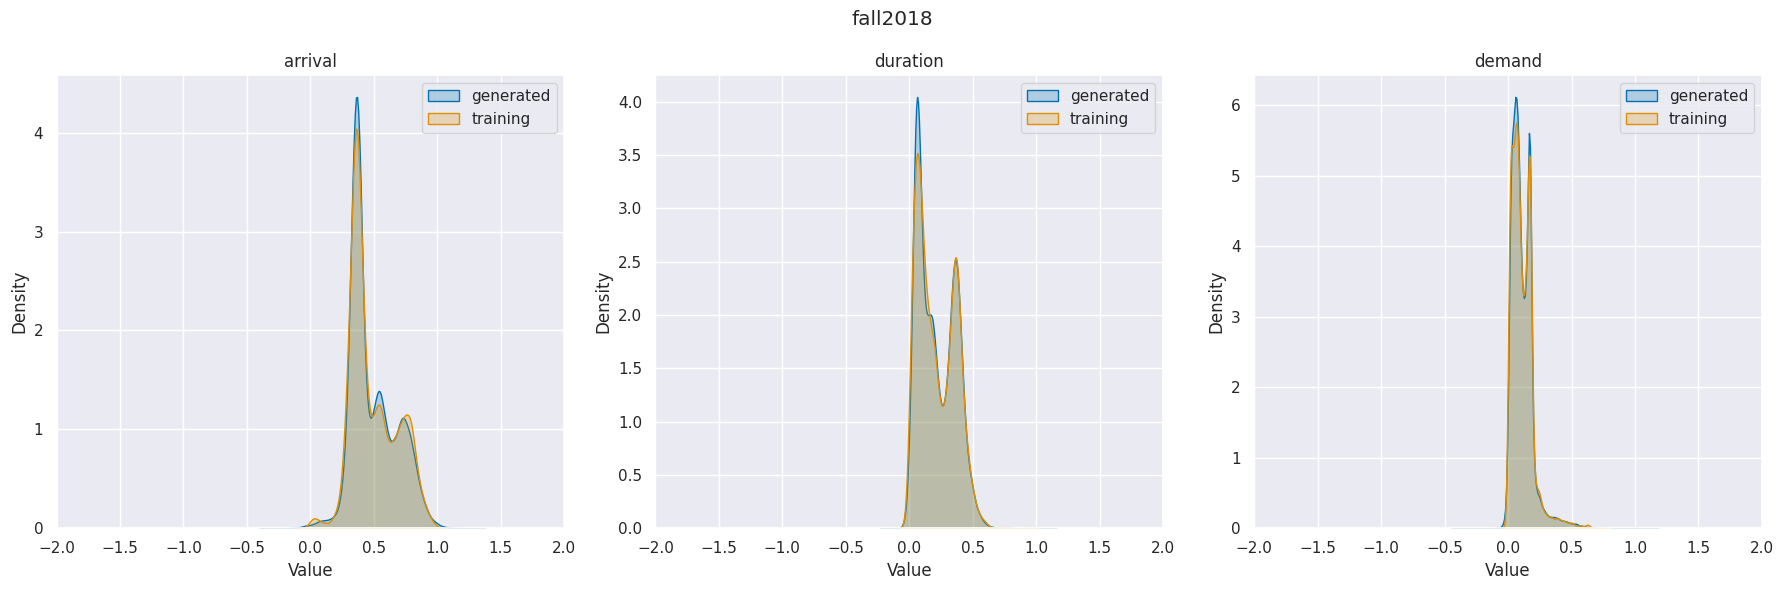

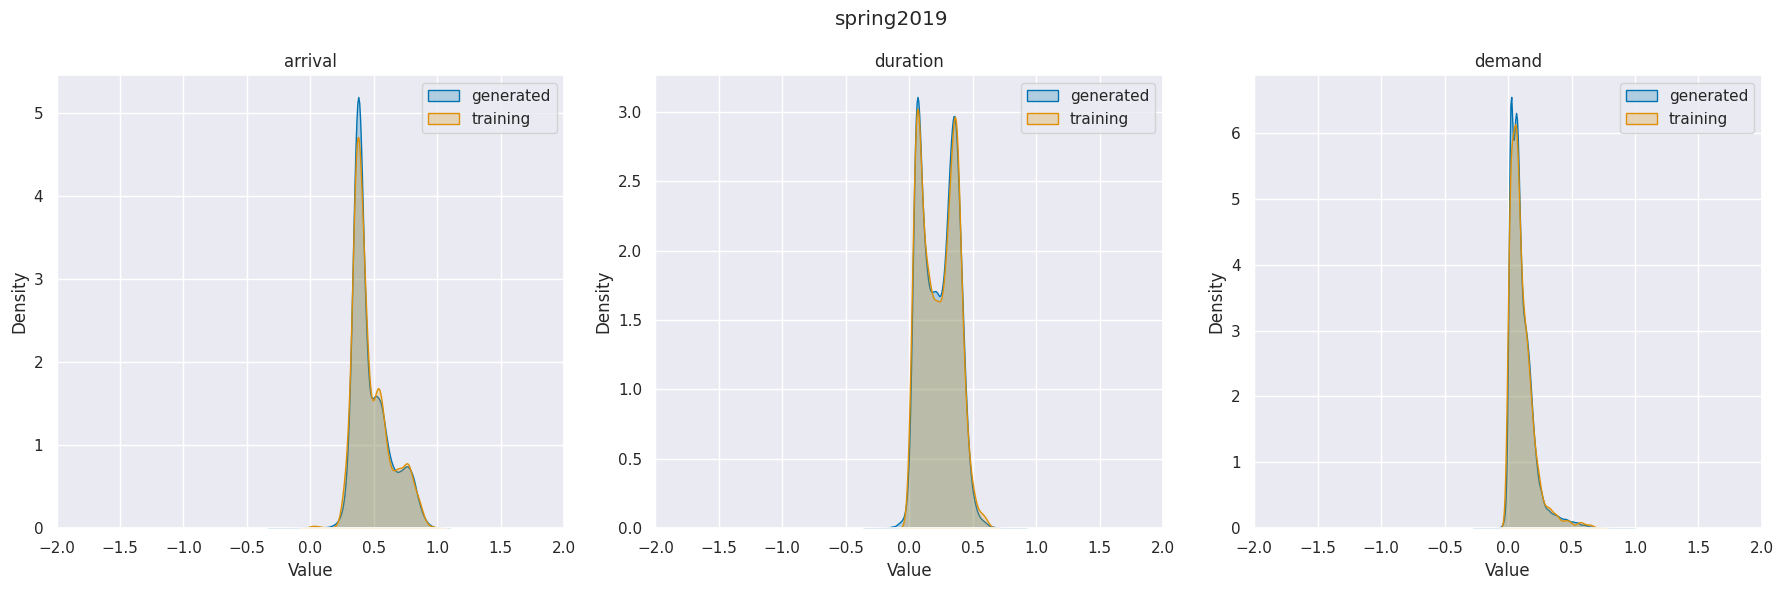

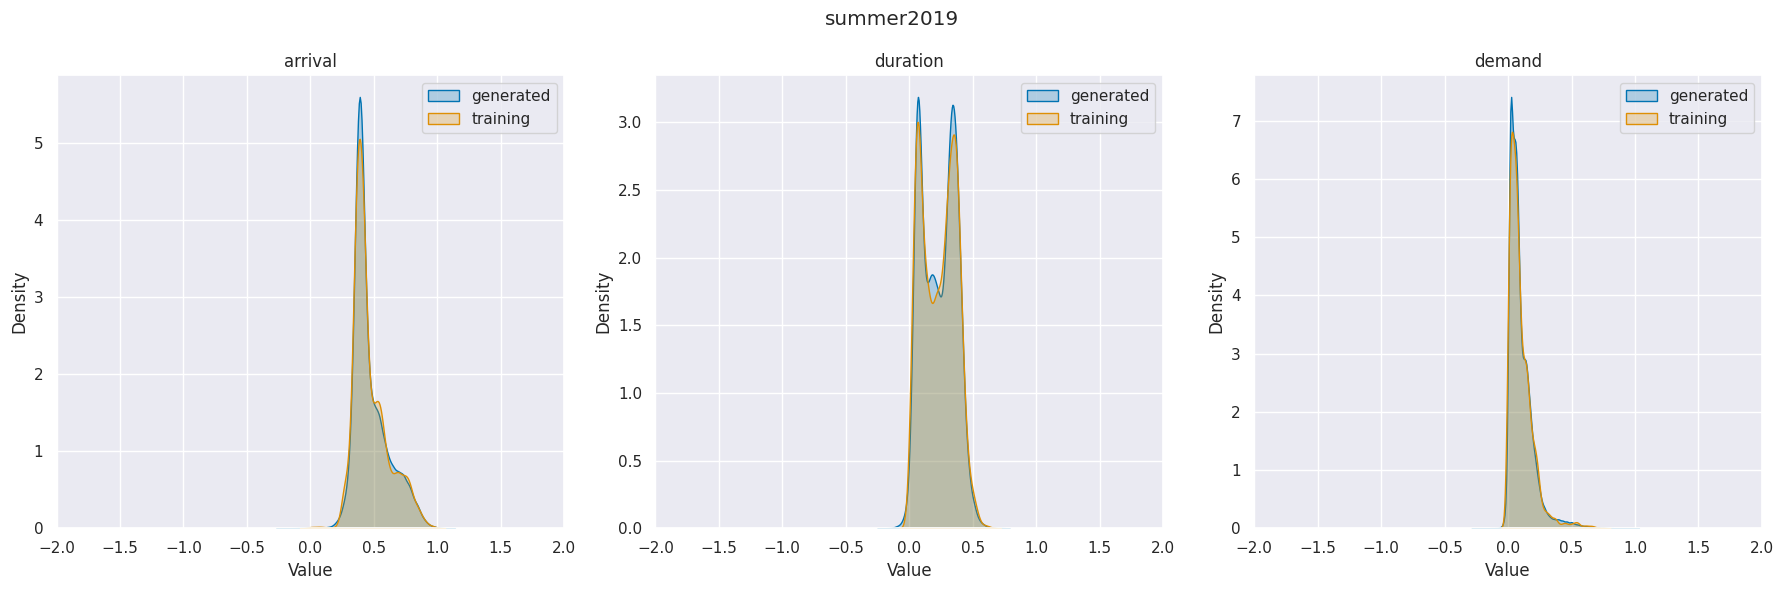

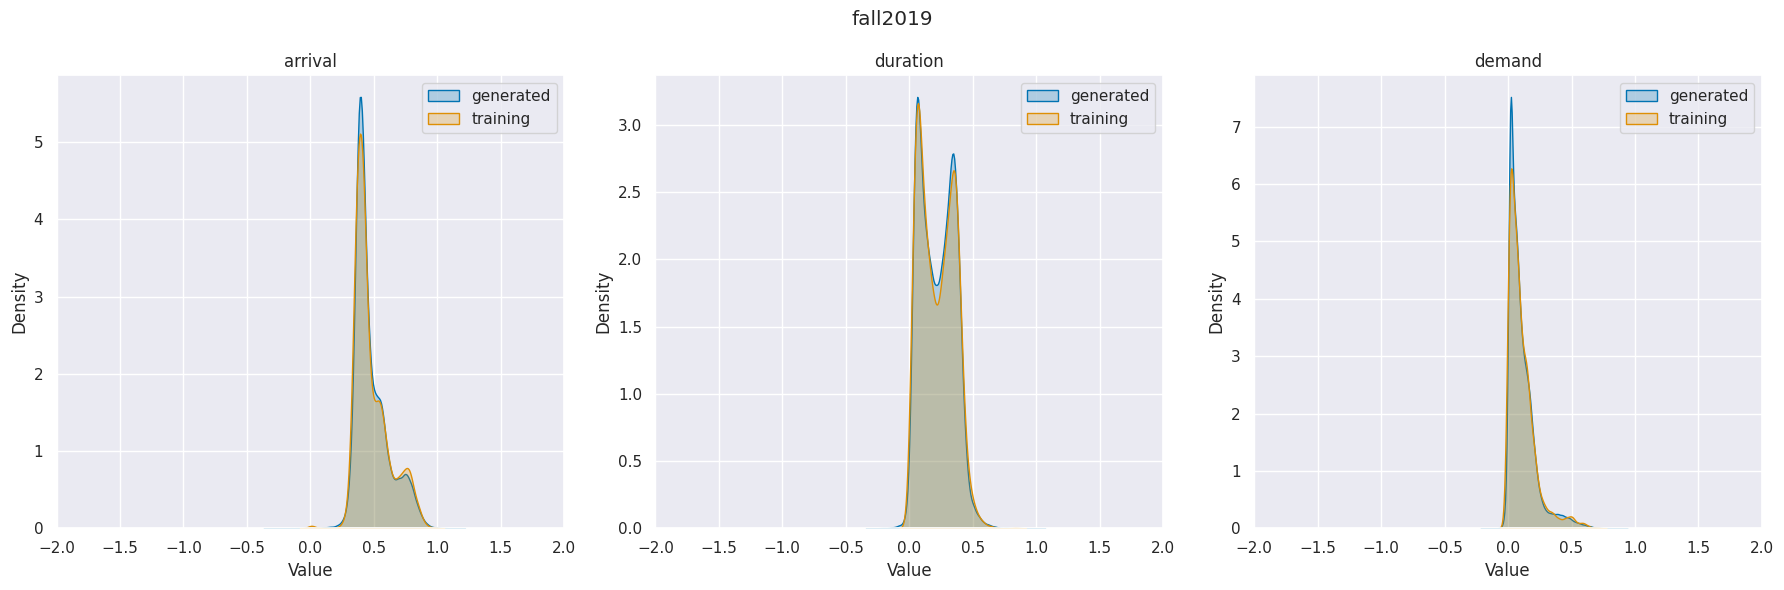

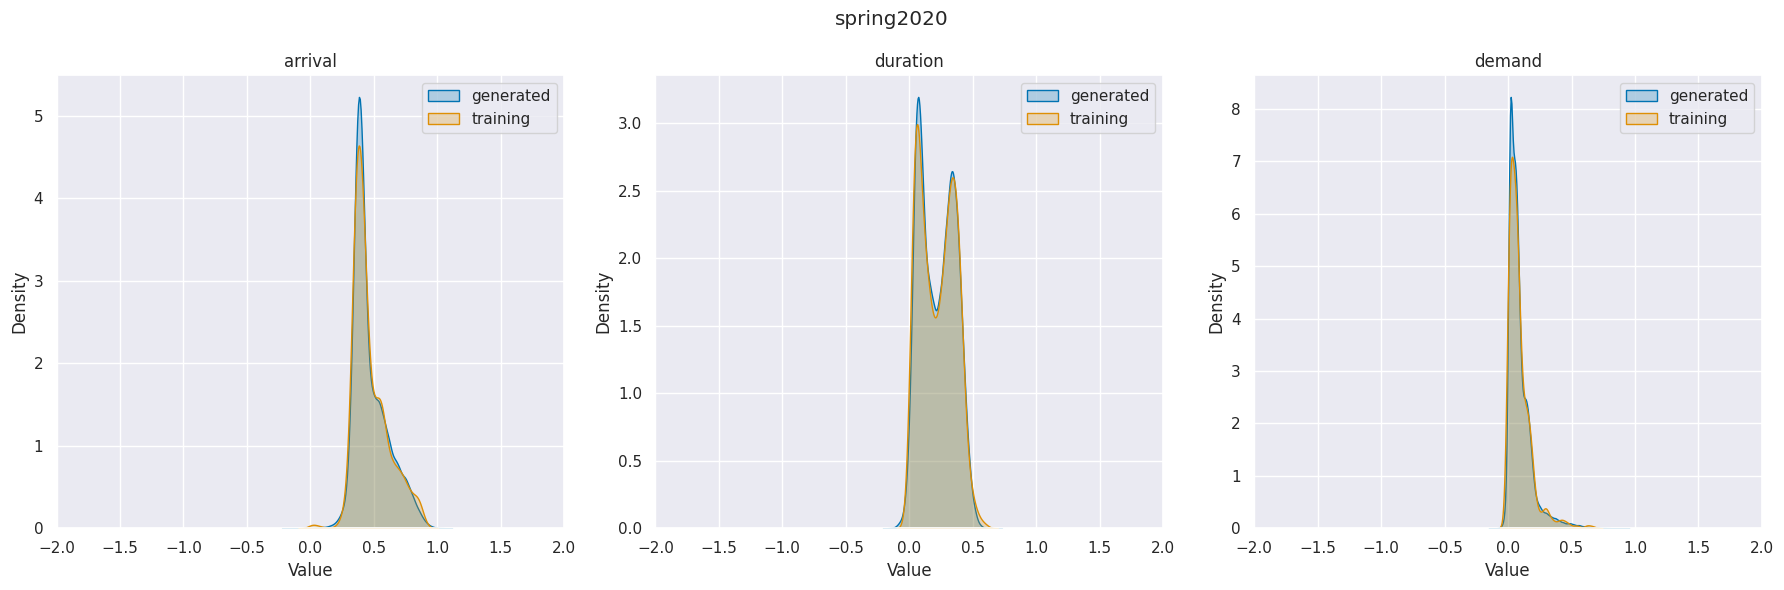

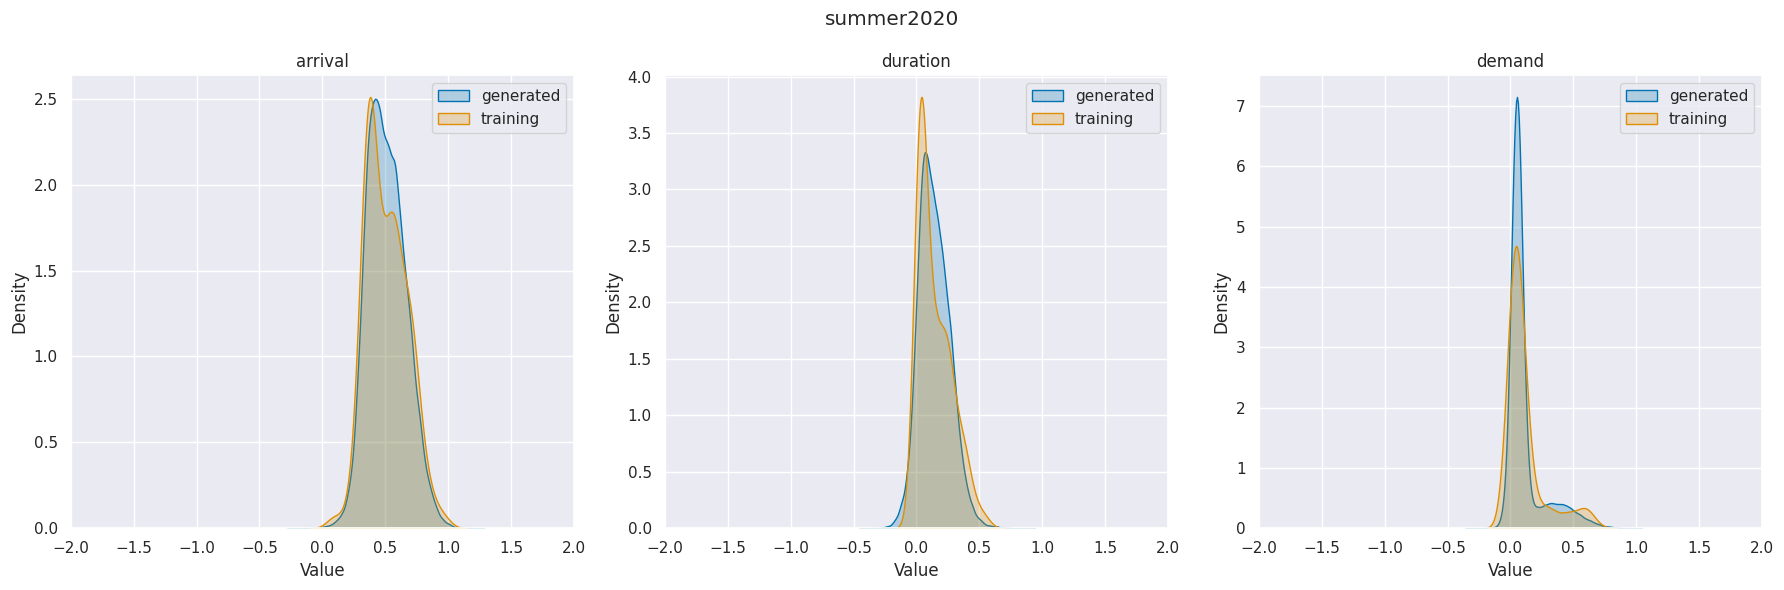

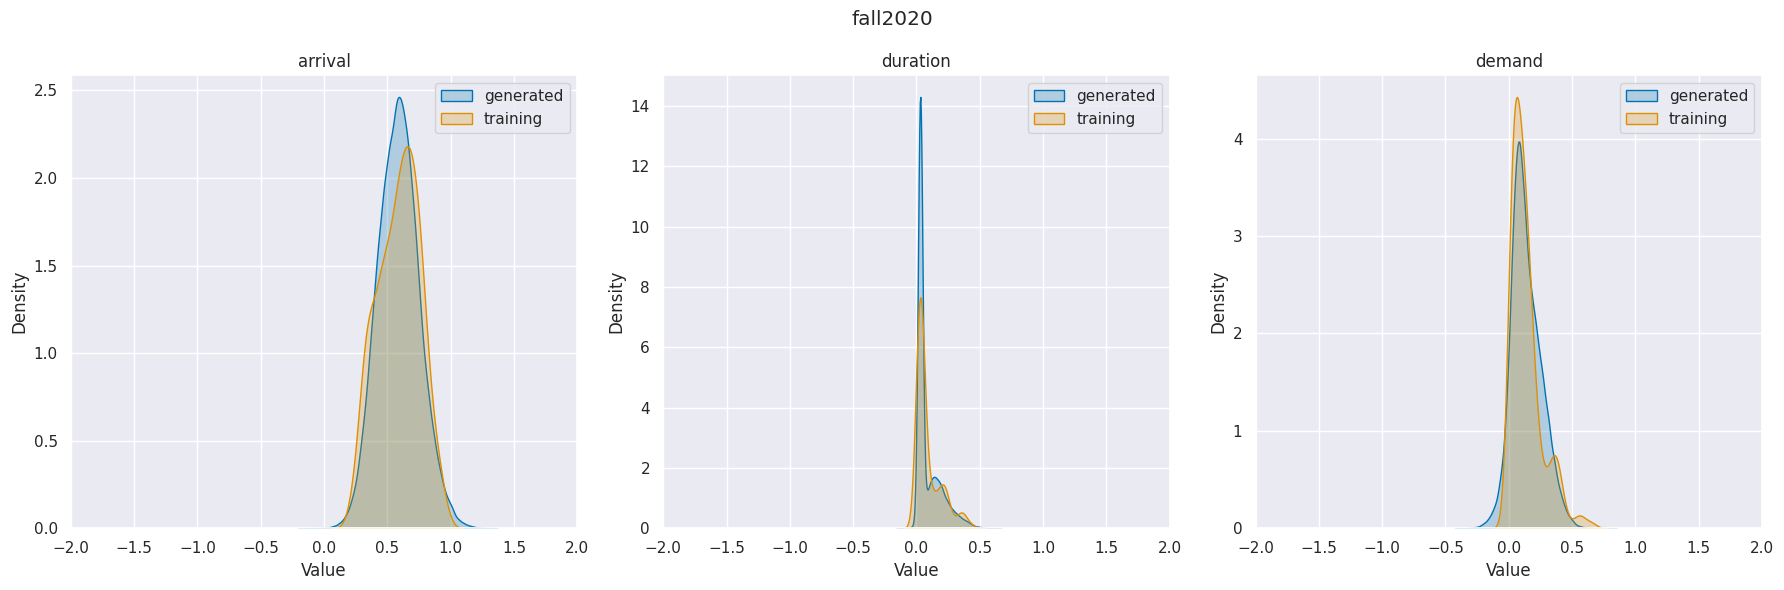

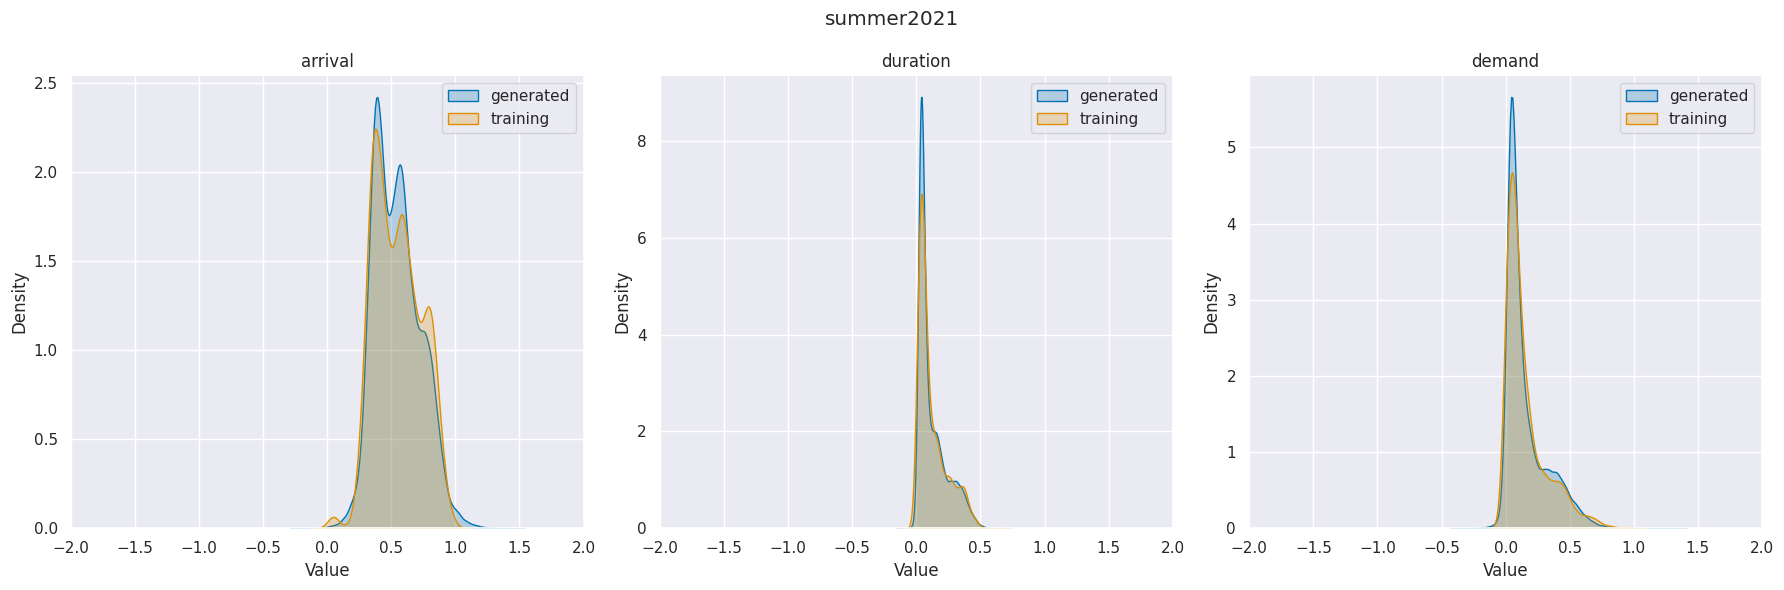

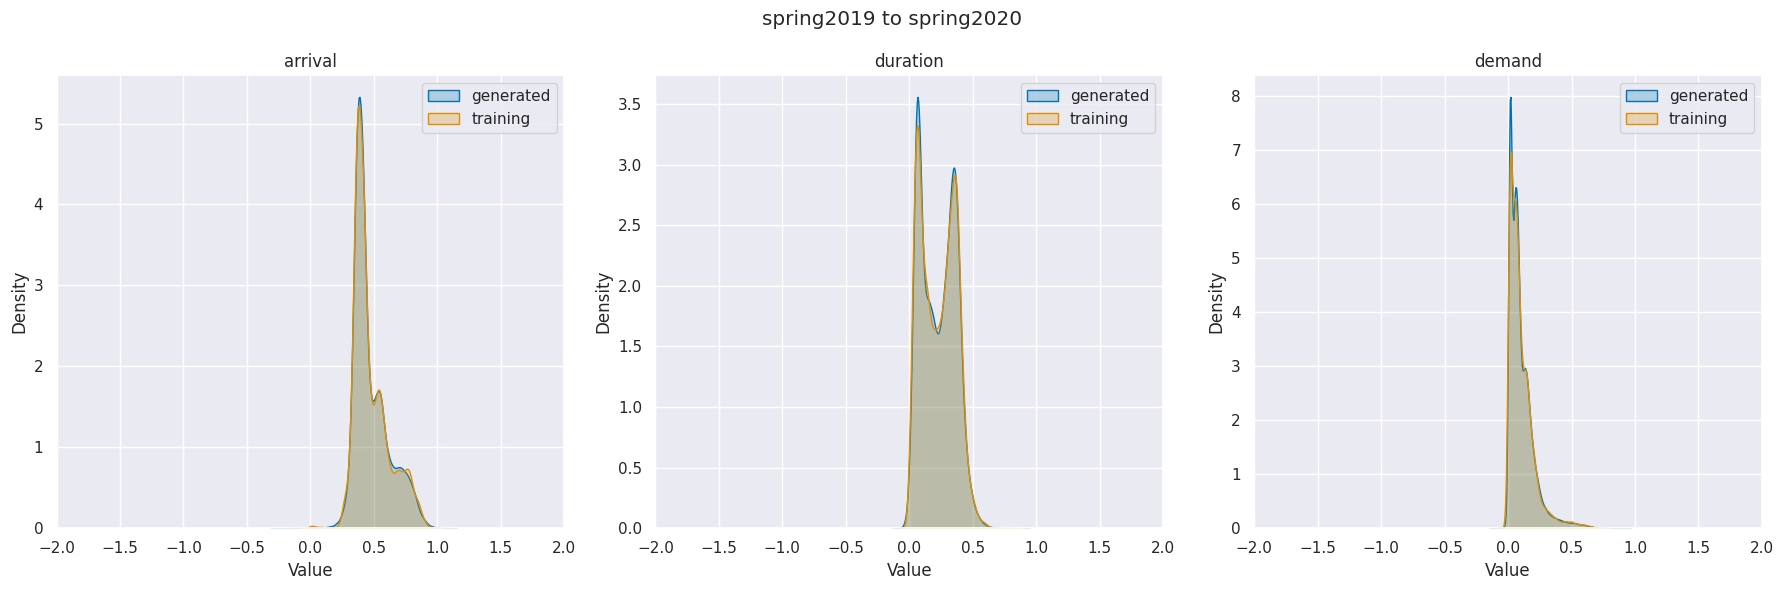

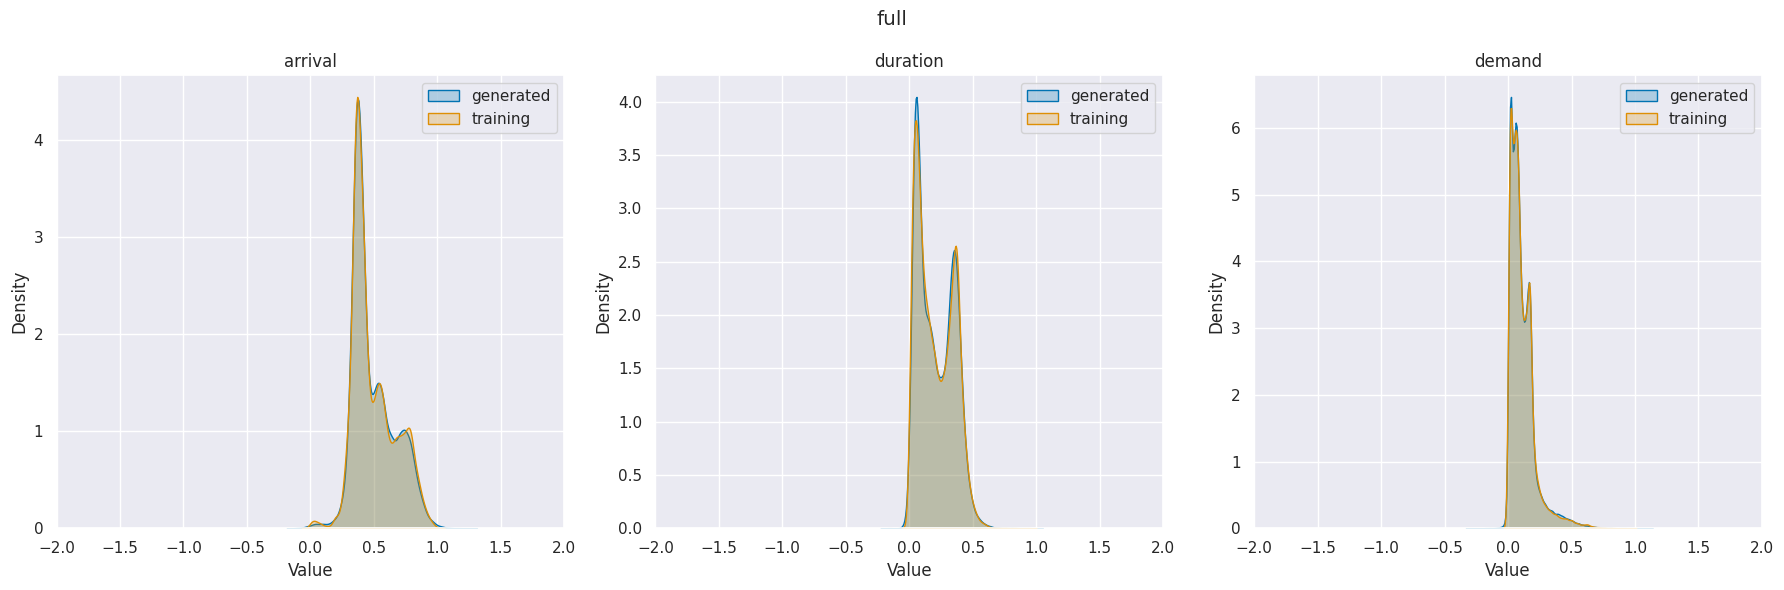

In [126]:
for season in data.keys():
    X_gen, _ = gmms[season][0].sample(100000) 
    X_train = gmms[season][1].transform(data[season][1])

    plot_kde(season, X_gen, X_train)

In [127]:
# from itertools import product
# import scipy

# results = {}
# fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24, 8), tight_layout=True)

# for i, feature in enumerate(["arrival", "departure", "demand"]):
#     # results[feature] = {}
#     results = {}
#     for (season_a, X_a), (season_b, X_b) in product(data.items(), data.items()):
#         v = 1 - scipy.stats.ks_2samp(X_a[:, i], X_b[:, i], method="exact").pvalue#.statistic#.pvalue
#         # results[feature][f"{season_a} vs {season_b}"] = v
#         results.setdefault(season_a, {})

#         results[season_a][season_b] = v

#     # , columns=results.keys())
#     df = pd.DataFrame.from_dict(results, orient='index')
#     sns.heatmap(df, annot=True, ax=axes[i], fmt=".2g",cmap="coolwarm_r", square=False)

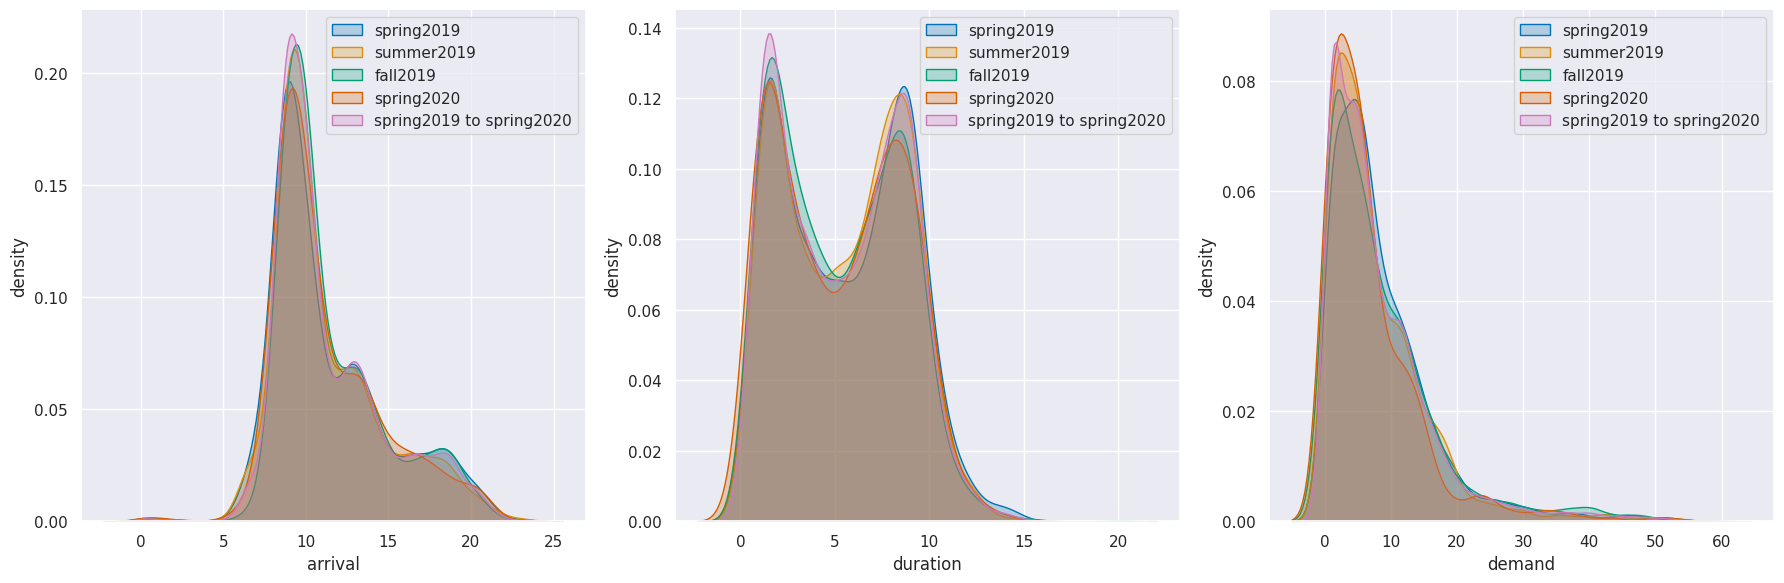

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6), tight_layout=True)

for i, feature in enumerate(["arrival", "duration", "demand"]):
    ax = axes[i]
    for season, (_, X) in data.items():
        if season == "full" or season == "???" or not ("2019" in season or "spring2020" in season):
            continue

        sns.kdeplot(X[:, i], label=season, fill=True, ax=ax)

    ax.set_xlabel(feature)
    ax.set_ylabel("density")
    ax.legend()

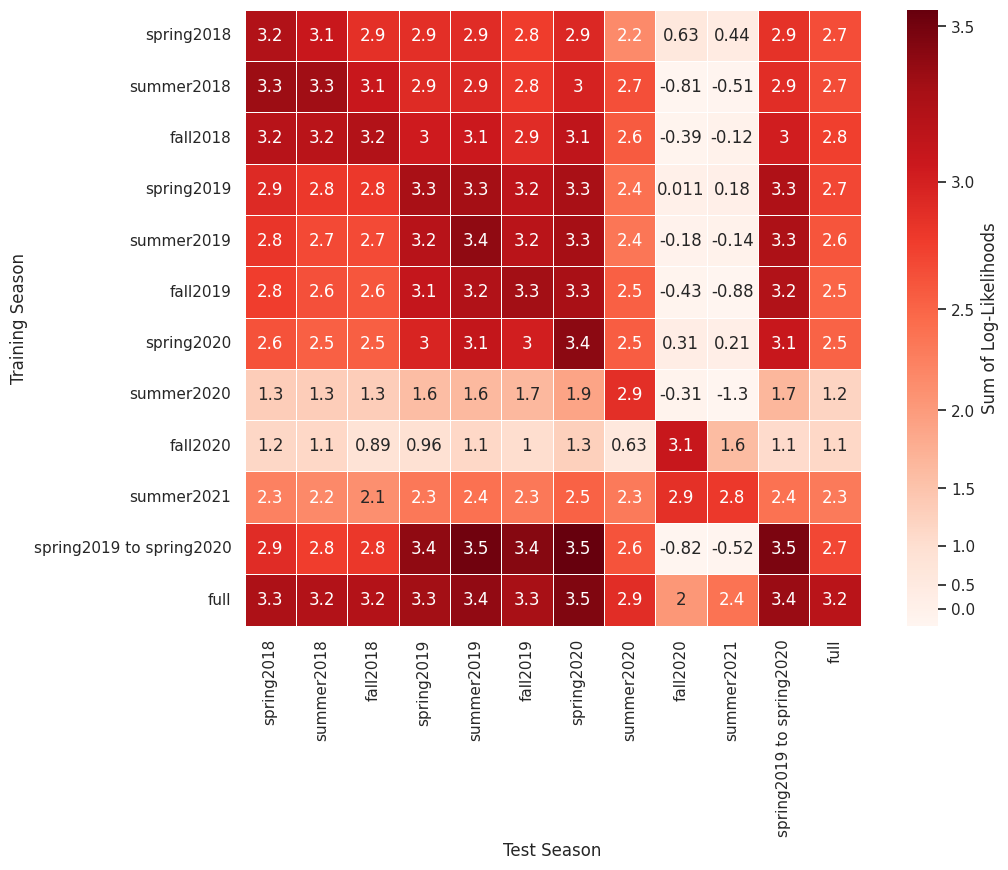

In [140]:
from matplotlib.colors import LogNorm, PowerNorm


results = {}
for key, (gmm, scaler) in gmms.items():
    results[key] = {}  # Each GMM gets a dictionary for seasons
    for season in data.keys():
        _, X = data[season]
        X = scaler.transform(X)
        # results[key][season] = np.exp(gmm.score(X))
        results[key][season] = gmm.score(X)


df = pd.DataFrame.from_dict(results, orient='index', columns=results.keys())

plt.figure(figsize=(12, 8))
sns.heatmap(df, annot=True, cmap="Reds",  linewidths=0.5, fmt=".2g", square=True,
            norm=PowerNorm(gamma=np.e), cbar_kws={"ticks": np.arange(0, 4, 0.5), "label": "Sum of Log-Likelihoods"}) #[0, 1, 2, 3, 3.5]
# plt.title("Sum of Log-Likelihood")
plt.xlabel("Test Season")
plt.ylabel("Training Season")
# plt.xticks(rotation=45)
plt.show()

In [141]:
with open("triple_gmm+sc.pkl", "wb") as f:
    pickle.dump(gmms["spring2019 to spring2020"], f)